In [ ]:
#刪除過去的csv檔案
!rm *.csv

rm: cannot remove '*.csv': No such file or directory


In [ ]:
#查看工作目錄內的資料
!ls

sample_data


In [ ]:
#上傳要分析的資料檔案csv.
from google.colab import files
uploaded = files.upload()
import math
import pandas as pd

df = pd.read_csv("MData.csv") #如果要上傳xlsx檔案. 要改函式

print("1.匯入資料集：")
print(df.head())

Saving MData.csv to MData.csv
1.匯入資料集：
   Gender  B-Days    GA     BBW  AS-1  AS-5  PROM  Maternal Fever  \
0     1.0   102.0  37.0  2950.0   9.0  10.0   0.0             0.0   
1     0.0    90.0  29.0  1150.0   7.0   9.0   0.0             0.0   
2     1.0    98.0  33.0  2835.0   4.0   8.0   1.0             0.0   
3     1.0    98.0  33.0  2835.0   4.0   8.0   1.0             0.0   
4     1.0    99.0  33.0  2835.0   4.0   8.0   1.0             0.0   

   Chorioamnionitis  Antibiotic  ...  Cefotaxime  Fluconazole  Oxacillin  \
0               0.0         0.0  ...         NaN          NaN        NaN   
1               0.0         1.0  ...         NaN          NaN        NaN   
2               0.0         0.0  ...         1.0          NaN        NaN   
3               0.0         0.0  ...         1.0          NaN        NaN   
4               0.0         0.0  ...         1.0          NaN        NaN   

   Cefazolin  Amoxycilin  Clavulani  Vancomycin  Sulbactam  Die  Septicemia  
0        Na

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            727 non-null    float64
 1   B-Days            483 non-null    float64
 2   GA                730 non-null    float64
 3   BBW               711 non-null    float64
 4   AS-1              726 non-null    float64
 5   AS-5              726 non-null    float64
 6   PROM              681 non-null    float64
 7   Maternal Fever    681 non-null    float64
 8   Chorioamnionitis  681 non-null    float64
 9   Antibiotic        431 non-null    float64
 10  NPO               432 non-null    float64
 11  Dopamin           432 non-null    float64
 12  Dobutamine        432 non-null    float64
 13  Epinephrine       432 non-null    float64
 14  Milrinone         428 non-null    float64
 15  Catheter Use      410 non-null    float64
 16  PH                410 non-null    float64
 1

**預測死亡模型**

In [ ]:
for i in range(50,61):
  df=df.fillna({df.columns[i]:0})
#50-61都是用藥缺值補0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            727 non-null    float64
 1   B-Days            483 non-null    float64
 2   GA                730 non-null    float64
 3   BBW               711 non-null    float64
 4   AS-1              726 non-null    float64
 5   AS-5              726 non-null    float64
 6   PROM              681 non-null    float64
 7   Maternal Fever    681 non-null    float64
 8   Chorioamnionitis  681 non-null    float64
 9   Antibiotic        431 non-null    float64
 10  NPO               432 non-null    float64
 11  Dopamin           432 non-null    float64
 12  Dobutamine        432 non-null    float64
 13  Epinephrine       432 non-null    float64
 14  Milrinone         428 non-null    float64
 15  Catheter Use      410 non-null    float64
 16  PH                410 non-null    float64
 1

In [ ]:
cols=[0,2,3,4,5,6,7,8,50,51,52,53,54,55,56,57,58,59,60,61] #死亡跟敗血症無相關性所以把敗血症拔掉
df2=pd.DataFrame()
for i in cols:
  df2[df.columns[i]]=df.iloc[:,i]

df2

,Gender,GA,BBW,AS-1,AS-5,PROM,Maternal Fever,Chorioamnionitis,Ampicillin,Gentamicin,Metronidazole,Cefotaxime,Fluconazole,Oxacillin,Cefazolin,Amoxycilin,Clavulani,Vancomycin,Sulbactam,Die
0,1.0,37.0,2950.0,9.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,29.0,1150.0,7.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
727,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
728,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
729,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#去除空值, 此次應用因為資料沒有就沒有, 無法用其他方式填補, 故宜採去除
df2c=df2.dropna()
df2c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            659 non-null    float64
 1   GA                659 non-null    float64
 2   BBW               659 non-null    float64
 3   AS-1              659 non-null    float64
 4   AS-5              659 non-null    float64
 5   PROM              659 non-null    float64
 6   Maternal Fever    659 non-null    float64
 7   Chorioamnionitis  659 non-null    float64
 8   Ampicillin        659 non-null    float64
 9   Gentamicin        659 non-null    float64
 10  Metronidazole     659 non-null    float64
 11  Cefotaxime        659 non-null    float64
 12  Fluconazole       659 non-null    float64
 13  Oxacillin         659 non-null    float64
 14  Cefazolin         659 non-null    float64
 15  Amoxycilin        659 non-null    float64
 16  Clavulani         659 non-null    float64
 1

In [ ]:
#分析目標欄位的資料比例
Die_num=df2c.groupby(df2c.columns[19]).size().reset_index(name='size')
Die_ratio=Die_num['size'][0]/len(df2c.index)

Die_num.insert(loc=2, column='ratio', value=[Die_ratio, 1-Die_ratio])
Die_num

,Die,size,ratio
0,0,601,0.911988
1,1,58,0.088012


In [ ]:
#觀察資料區間, between(x,y)
df["B-Days"].between(50,200) #觀察不同的呈現方式

0       True
1       True
2       True
3       True
4       True
       ...  
726    False
727    False
728    False
729    False
730    False
Name: B-Days, Length: 731, dtype: bool

In [ ]:
df["BBW"].between(1000,3000)

0       True
1       True
2       True
3       True
4       True
       ...  
726    False
727    False
728    False
729    False
730    False
Name: BBW, Length: 731, dtype: bool

**PCA**

In [ ]:
# 進行 PCA, Y要先移出, 完成再移入
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df2c2=df2c.drop(['Die'],axis=1)

scalar = StandardScaler().fit(df2c2)
cols_std = scalar.transform(df2c2)
df2c_std = pd.DataFrame(cols_std, index=df2c2.index, columns=df2c2.columns)

num_pc = 19
pca = PCA(n_components=num_pc)
pca.fit(df2c_std)
pc_scores = pd.DataFrame(pca.transform(df2c_std))
pc_scores.columns = ['PC'+str(i+1) for i in range(19)]
pc_scores.index=df2c_std.index
pc_scores['Die']=df2c['Die']
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,Die
0,-1.889916,0.093654,-0.372639,-0.938832,-0.251604,0.593153,0.086277,-0.087305,0.170290,-0.226264,-0.320490,-0.813501,-0.118457,0.472101,-0.309121,0.123267,0.029703,0.168886,2.325217e-17,0
1,0.273468,0.000799,-0.073532,-0.545953,-0.921043,-0.710945,-0.596153,0.012393,0.220437,-0.164873,0.507338,0.576165,0.869691,-0.040071,-0.622740,-0.337636,0.154666,0.100708,2.325217e-17,0
2,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,0
3,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,0
4,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,0


**資料使用原始數據**

**邏輯斯迴歸**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

X, y = df2c.iloc[:,0:19],df2c.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l2')
logit.fit(X_train, y_train)
print('LR:',logit.score(X_test, y_test))

LR: 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,solver)
logit = LogisticRegression(solver='saga')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.9242424242424242


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,solver)
logit = LogisticRegression(solver='liblinear', penalty='l1')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.9242424242424242


In [ ]:
logit = LogisticRegression(solver='liblinear', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.9166666666666666


In [ ]:
logit = LogisticRegression(solver='newton-cg', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.946969696969697


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [ ]:
logit = LogisticRegression(solver='lbfgs', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.9166666666666666


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,max_iter)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=2000)
logit.fit(X_train, y_train)

print('LR:',logit.score(X_test, y_test))

LR: 0.946969696969697


In [ ]:
logit = LogisticRegression(class_weight='balanced',solver='newton-cg', penalty='l2')

logit.fit(X_train, y_train)
print('LR:',logit.score(X_test, y_test))

LR: 0.8712121212121212


In [ ]:
#可靠度-decision_function、預測機率值、預測結果:Die
logit.fit(X_train, y_train)
print('Descision function:\n',logit.decision_function(X_test)[:6])
print('Predicted Prob Die.:\n', logit.predict_proba(X_test)[:6])
print('Predicted Result.:\n', logit.predict(X_test)[:6])

Descision function:
 [-0.57899207  2.60196632 -0.06452506 -3.29603432 -3.43159035  1.0939901 ]
Predicted Prob Die.:
 [[0.64083545 0.35916455]
 [0.06901198 0.93098802]
 [0.51612567 0.48387433]
 [0.96429251 0.03570749]
 [0.96867736 0.03132264]
 [0.25086766 0.74913234]]
Predicted Result.:
 [0 1 0 0 0 1]


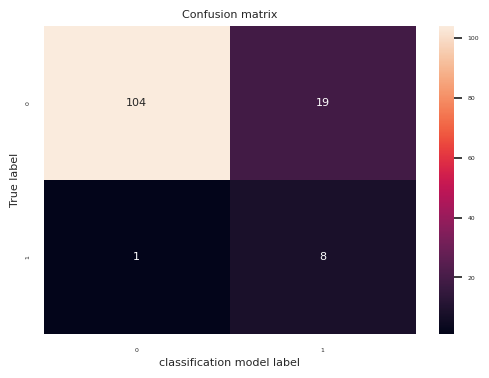

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = logit.predict(X_test)

x_axis_labels=['0','1']
y_axis_labels=['0','1']

sns.set(font_scale=.4)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", annot_kws={"size":8}, xticklabels=x_axis_labels, yticklabels=y_axis_labels,);
plt.title("Confusion matrix", fontsize=8)
plt.ylabel('True label', fontsize=8)
plt.xlabel('classification model label', fontsize=8)
plt.show()
#  混淆矩陣
# conf_mat = confusion_matrix(y_test, y_pred)
# print("混淆矩陣：")
# print(conf_mat)

**準確度、敏感度、特異性、AUC score**

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,roc_curve, roc_auc_score

y_pred=logit.predict(X_test)

#準確度
accuracy =accuracy_score(y_test,y_pred)
print("Accuracy:{:.2f}%".format(accuracy*100))

# 敏感度
sensitivity = recall_score(y_test, y_pred)
print("敏感度：{:.2f}%".format(sensitivity*100))

# 特異性
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
print("特異性：{:.2f}%".format(specificity*100))

# AUC score
y_pred_proba = logit.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC score：{:.2f}".format(auc))

Accuracy:87.12%
敏感度：80.00%
特異性：84.55%
AUC score：0.83


**ROC Curve**

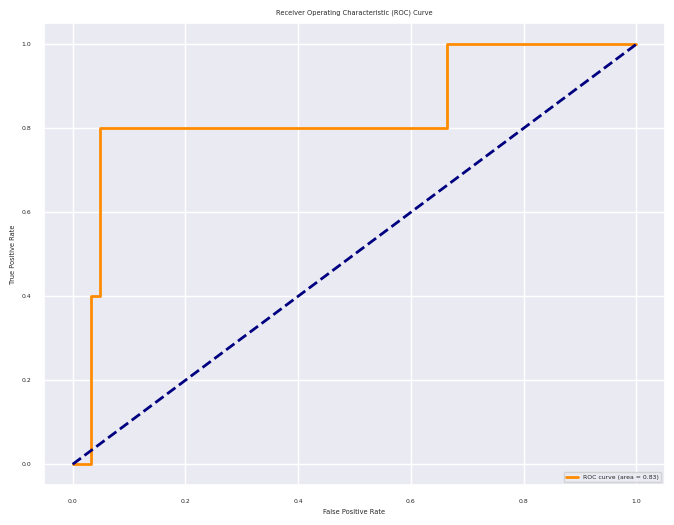

In [ ]:
import sklearn.metrics

fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(sklearn.metrics.roc_auc_score(y_test, y_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

**預測敗血症模型**

In [ ]:
for i in range(50,61):
  df=df.fillna({df.columns[i]:0})
#50-61都是用藥缺值補0
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 63 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            727 non-null    float64
 1   B-Days            483 non-null    float64
 2   GA                730 non-null    float64
 3   BBW               711 non-null    float64
 4   AS-1              726 non-null    float64
 5   AS-5              726 non-null    float64
 6   PROM              681 non-null    float64
 7   Maternal Fever    681 non-null    float64
 8   Chorioamnionitis  681 non-null    float64
 9   Antibiotic        431 non-null    float64
 10  NPO               432 non-null    float64
 11  Dopamin           432 non-null    float64
 12  Dobutamine        432 non-null    float64
 13  Epinephrine       432 non-null    float64
 14  Milrinone         428 non-null    float64
 15  Catheter Use      410 non-null    float64
 16  PH                410 non-null    float64
 1

In [ ]:
cols=[0,2,3,4,5,6,7,8,50,51,52,53,54,55,56,57,58,59,60,62] #敗血症跟死亡無相關性所以把死亡拔掉
df3=pd.DataFrame()
for i in cols:
  df3[df.columns[i]]=df.iloc[:,i]

df3

,Gender,GA,BBW,AS-1,AS-5,PROM,Maternal Fever,Chorioamnionitis,Ampicillin,Gentamicin,Metronidazole,Cefotaxime,Fluconazole,Oxacillin,Cefazolin,Amoxycilin,Clavulani,Vancomycin,Sulbactam,Septicemia
0,1.0,37.0,2950.0,9.0,10.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,29.0,1150.0,7.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,1.0,33.0,2835.0,4.0,8.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
727,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
728,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
729,0.0,25.0,624.0,7.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
#去除空值, 此次應用因為資料沒有就沒有, 無法用其他方式填補, 故宜採去除
df3c=df3.dropna()
df3c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 659 entries, 0 to 730
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gender            659 non-null    float64
 1   GA                659 non-null    float64
 2   BBW               659 non-null    float64
 3   AS-1              659 non-null    float64
 4   AS-5              659 non-null    float64
 5   PROM              659 non-null    float64
 6   Maternal Fever    659 non-null    float64
 7   Chorioamnionitis  659 non-null    float64
 8   Ampicillin        659 non-null    float64
 9   Gentamicin        659 non-null    float64
 10  Metronidazole     659 non-null    float64
 11  Cefotaxime        659 non-null    float64
 12  Fluconazole       659 non-null    float64
 13  Oxacillin         659 non-null    float64
 14  Cefazolin         659 non-null    float64
 15  Amoxycilin        659 non-null    float64
 16  Clavulani         659 non-null    float64
 1

In [ ]:
#分析目標欄位的資料比例
Septicemia_num=df3c.groupby(df3c.columns[19]).size().reset_index(name='size')
Septicemia_ratio=Septicemia_num['size'][0]/len(df3c.index)

Septicemia_num.insert(loc=2, column='ratio', value=[Septicemia_ratio, 1-Septicemia_ratio])
Septicemia_num

,Septicemia,size,ratio
0,0,587,0.890744
1,1,72,0.109256


In [ ]:
#切割資料集
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

X, y = df3c.iloc[:,0:19],df3c.iloc[:,19]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

print(Counter(y_test),Counter(y_test)[0]/(Counter(y_test)[0]+Counter(y_test)[1]))

Counter({0: 146, 1: 19}) 0.8848484848484849


**PCA**

In [ ]:
# 進行 PCA, Y要先移出, 完成再移入
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df3c3=df3c.drop(['Septicemia'],axis=1)

scalar = StandardScaler().fit(df3c3)
cols_std = scalar.transform(df3c3)
df3c_std = pd.DataFrame(cols_std, index=df3c3.index, columns=df3c3.columns)

num_pc = 19
pca = PCA(n_components=num_pc)
pca.fit(df3c_std)
pc_scores = pd.DataFrame(pca.transform(df3c_std))
pc_scores.columns = ['PC'+str(i+1) for i in range(19)]
pc_scores.index=df3c_std.index
pc_scores['Septicemia']=df3c['Septicemia']
pc_scores.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,Septicemia
0,-1.889916,0.093654,-0.372639,-0.938832,-0.251604,0.593153,0.086277,-0.087305,0.170290,-0.226264,-0.320490,-0.813501,-0.118457,0.472101,-0.309121,0.123267,0.029703,0.168886,2.325217e-17,0
1,0.273468,0.000799,-0.073532,-0.545953,-0.921043,-0.710945,-0.596153,0.012393,0.220437,-0.164873,0.507338,0.576165,0.869691,-0.040071,-0.622740,-0.337636,0.154666,0.100708,2.325217e-17,0
2,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,1
3,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,1
4,1.453827,-0.225390,0.553977,1.946997,3.603027,6.774463,-0.845470,-1.687268,-0.709885,-0.787258,0.087399,2.456619,1.400099,-0.215899,-0.476488,0.348748,0.508677,0.130202,-9.030902e-16,1


**使用原始數據**

**邏輯斯迴歸**

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter

a, b = df3c.iloc[:,0:19],df3c.iloc[:,19]
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, shuffle=True)

In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(penalty='l2')
logit.fit(a_train, b_train)
print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,solver)
logit = LogisticRegression(solver='saga')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,solver)
logit = LogisticRegression(solver='liblinear', penalty='l1')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
logit = LogisticRegression(solver='liblinear', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
logit = LogisticRegression(solver='newton-cg', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
logit = LogisticRegression(solver='lbfgs', penalty='l2')#'liblinear'、'newton-cg'、'lbfgs','sag' 和 'saga'
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
# 建立邏輯斯迴歸模型(預設為 OvR 策略, 2元分類,max_iter)
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression(max_iter=2000)
logit.fit(a_train, b_train)

print('LR:',logit.score(a_test, b_test))

LR: 0.8939393939393939


In [ ]:
logit = LogisticRegression(class_weight='balanced',solver='saga')

logit.fit(a_train, b_train)
print('LR:',logit.score(a_test, b_test))

LR: 0.8787878787878788


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
#可靠度-decision_function、預測機率值、預測結果:Septicemia
logit.fit(a_train, b_train)
print('Descision function:\n',logit.decision_function(a_test)[:6])
print('Predicted Prob Septicemia.:\n', logit.predict_proba(a_test)[:6])
print('Predicted Result.:\n', logit.predict(a_test)[:6])

Descision function:
 [-0.02827538 -0.04731444 -0.07053141 -0.11064456 -0.33678762 -0.24216363]
Predicted Prob Septicemia.:
 [[0.50706837 0.49293163]
 [0.5118264  0.4881736 ]
 [0.51762555 0.48237445]
 [0.52763295 0.47236705]
 [0.58340999 0.41659001]
 [0.56024677 0.43975323]]
Predicted Result.:
 [0 0 0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


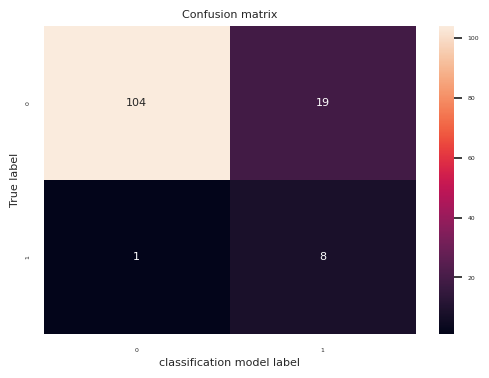

In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

b_pred = logit.predict(a_test)

a_axis_labels=['0','1']
b_axis_labels=['0','1']

sns.set(font_scale=.4)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_mat, annot=True, fmt="d", annot_kws={"size":8}, xticklabels=a_axis_labels, yticklabels=b_axis_labels,);
plt.title("Confusion matrix", fontsize=8)
plt.ylabel('True label', fontsize=8)
plt.xlabel('classification model label', fontsize=8)
plt.show()

**準確度、敏感度、特異性、AUC score**

In [ ]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score,precision_score,recall_score,roc_curve, roc_auc_score

b_pred=logit.predict(a_test)

#準確度
accuracy =accuracy_score(b_test,b_pred)
print("Accuracy:{:.2f}%".format(accuracy*100))

# 敏感度
sensitivity = recall_score(b_test, b_pred)
print("敏感度：{:.2f}%".format(sensitivity*100))

# 特異性
specificity = conf_mat[0, 0] / (conf_mat[0, 0] + conf_mat[0, 1])
print("特異性：{:.2f}%".format(specificity*100))

# AUC score
b_pred_proba = logit.predict_proba(a_test)[:, 1]
auc = roc_auc_score(b_test, b_pred_proba)
print("AUC score：{:.2f}".format(auc))

Accuracy:85.61%
敏感度：28.57%
特異性：84.55%
AUC score：0.71


**ROC Curve**

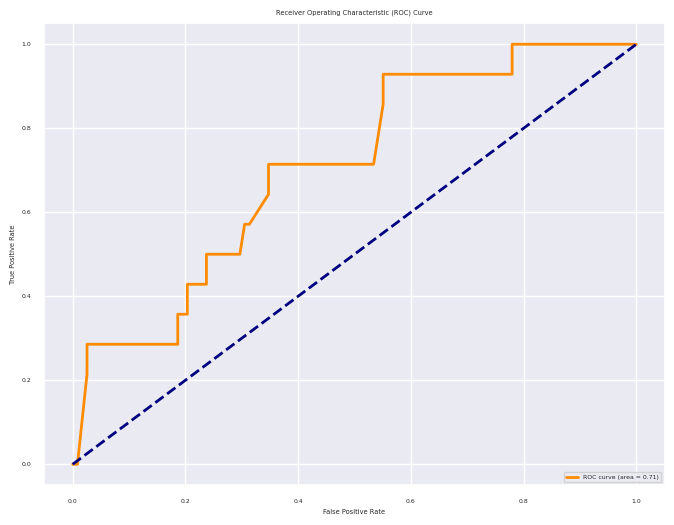

In [ ]:
import sklearn.metrics

fpr, tpr, _ = roc_curve(b_test, b_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(sklearn.metrics.roc_auc_score(b_test, b_pred_proba)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()